In [1]:
import sys
sys.path.insert(0, '../..')  # Füge das übergeordnete Verzeichnis zum Python-Pfad hinzu
from utils_functions import to_float_array, df_d0, dataframe1
import glob
import os
import pandas as pd
from IPython.display import display
import numpy as np

Funktionen erfolgreich definiert:
1. fit_exponential_decay(data_frames)
2. plot_data_with_fits(results, title, save_path, uniform_axes)
3. plot_parameter_histograms(results, save_path, figsize)
4. fit_linear(data_frames)
5. plot_linear_fits(results, title, save_path, uniform_axes)
6. plot_slope_histogram(results, save_path, figsize)


In [2]:
def df_d0_Hepes(x,y):
    """
    Berechnet die relative Änderung gegenüber dem ersten Wert.
    Formel: (x[i] - y[0]) / y[0]
    """
    df_d0 = []
    for i in range(0, len(x)):
        df_d0.append((x[i] - y[0]) / y[0])
    return df_d0

def Influx_data_Hepes(df1, x, y, z, w):
    """
    Erstellt einen DataFrame mit Mittelwerten und Standardabweichungen
    aus einem CSV-DataFrame und vier Zeilenindizes.
    
    Parameter:
    - df1: Eingabe-DataFrame (aus CSV)
    - x, y, z, w: Zeilenindizes für Zeit und die drei Messungen
    
    Rückgabe:
    - DataFrame mit Spalten: Time, 1.Messung, 2.Messung, 3.Messung, 
      Mittelwerte, Standardabweichung
    """
    df1 = df1.replace('OVER', np.nan)
    mM_10 = pd.DataFrame()
    mM_1= pd.DataFrame()
    mM_0_1 = pd.DataFrame()
    Hepes= pd.DataFrame()
    results = pd.DataFrame()
    
    #Hepes
        
    Hepes["1.Messung"] = to_float_array(np.array(df1.iloc[y+9])[1:])
    Hepes["2.Messung"] = to_float_array(np.array(df1.iloc[z+9])[1:])
    Hepes["3.Messung"] = to_float_array(np.array(df1.iloc[w+9])[1:])
    
    Hepes["Mittelwerte"] = Hepes[["1.Messung", "2.Messung", "3.Messung"]].mean(axis=1).tolist()
    
   
    results["Time"] = to_float_array(np.array(df1.iloc[x])[1:])
    mM_10["Time"] = to_float_array(np.array(df1.iloc[x])[1:])
    mM_1["Time"] = to_float_array(np.array(df1.iloc[x])[1:])
    mM_0_1["Time"] = to_float_array(np.array(df1.iloc[x])[1:])
    Hepes["Time"] = to_float_array(np.array(df1.iloc[x])[1:])
    #10mM    
    mM_10["1.Messung"] = df_d0_Hepes(to_float_array(np.array(df1.iloc[y])[1:]),Hepes["Mittelwerte"])
    mM_10["2.Messung"] = df_d0_Hepes(to_float_array(np.array(df1.iloc[z])[1:]),Hepes["Mittelwerte"])
    mM_10["3.Messung"] = df_d0_Hepes(to_float_array(np.array(df1.iloc[w])[1:]),Hepes["Mittelwerte"])
    
    # Berechne Mittelwert über die ersten drei Messung-Spalten
    mittelwerte1 = mM_10[["1.Messung", "2.Messung", "3.Messung"]].mean(axis=1).tolist()
    results["10 mM Mittelwerte"] = mittelwerte1
    
    # Berechne Standardabweichung
    standardabweichung1 = mM_10[["1.Messung", "2.Messung", "3.Messung"]].std(axis=1).tolist()
    results["10 mM Standardabweichung"] = standardabweichung1
    
    #1mM
       
    mM_1["1.Messung"] = df_d0_Hepes(to_float_array(np.array(df1.iloc[y+3])[1:]),Hepes["Mittelwerte"])
    mM_1["2.Messung"] = df_d0_Hepes(to_float_array(np.array(df1.iloc[z+3])[1:]),Hepes["Mittelwerte"])
    mM_1["3.Messung"] = df_d0_Hepes(to_float_array(np.array(df1.iloc[w+3])[1:]),Hepes["Mittelwerte"])
    
    # Berechne Mittelwert über die ersten drei Messung-Spalten
    mittelwerte2 = mM_1[["1.Messung", "2.Messung", "3.Messung"]].mean(axis=1).tolist()
    results["1 mM Mittelwerte"] = mittelwerte2
    
    # Berechne Standardabweichung
    standardabweichung2 = mM_1[["1.Messung", "2.Messung", "3.Messung"]].std(axis=1).tolist()
    results["1 mM Standardabweichung"] = standardabweichung2
    
    #0,1 mM
        
    mM_0_1["1.Messung"] = df_d0_Hepes(to_float_array(np.array(df1.iloc[y+6])[1:]),Hepes["Mittelwerte"])
    mM_0_1["2.Messung"] = df_d0_Hepes(to_float_array(np.array(df1.iloc[z+6])[1:]),Hepes["Mittelwerte"])
    mM_0_1["3.Messung"] = df_d0_Hepes(to_float_array(np.array(df1.iloc[w+6])[1:]),Hepes["Mittelwerte"])
    
    
    # Berechne Mittelwert über die ersten drei Messung-Spalten
    mittelwerte3 = mM_0_1[["1.Messung", "2.Messung", "3.Messung"]].mean(axis=1).tolist()
    results["0,1 mM Mittelwerte"] = mittelwerte3
    
    # Berechne Standardabweichung
    standardabweichung3 = mM_0_1[["1.Messung", "2.Messung", "3.Messung"]].std(axis=1).tolist()
    results["0,1 mM Standardabweichung"] = standardabweichung3
    
    
    # Stelle sicher, dass 'Time' numeric ist
    
    merged = mM_10.merge(mM_1, on='Time', how='outer', suffixes=('_10','_1'))
    merged = merged.merge(mM_0_1, on='Time', how='outer')
    merged = merged.merge(Hepes, on='Time', how='outer', suffixes=('_0.1','_Hepes'))
    merged = merged.sort_values('Time').reset_index(drop=True)
    return results, merged

In [3]:
# Daten einlesen in Dataframes
data_path = '/workspaces/EWT/EWT5/data/EWT5_mit_Notizen.ods'
df_I_BSG_MCT1_ilacco1_0 = pd.read_excel(data_path, engine='odf', sheet_name="Sheet1", skiprows=36)
df_I_BSG_MCT1_ilacco1_1= pd.read_excel(data_path, engine='odf', sheet_name="Sheet3", skiprows=36)
df_I_BSG_MCT1_ilacco1_2= pd.read_excel(data_path, engine='odf', sheet_name="Sheet4", skiprows=36)
df_I_BSG_MCT1_ilacco1_0_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet5", skiprows=36)
df_I_BSG_MCT1_ilacco1_1_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet14", skiprows=36)
df_I_BSG_MCT1_ilacco1_2_50µM_CCCP = pd.read_excel(data_path, engine='odf', sheet_name="Sheet15", skiprows=36)
print(df_I_BSG_MCT1_ilacco1_0)

    Startzeit:                               20.11.2025 11:18:40 Unnamed: 2  \
0          NaN                                               NaN        NaN   
1          NaN                                               NaN        NaN   
2   Zyklus Nr.                                                 1          2   
3     Zeit [s]                                                 0         13   
4   Temp. [°C]                                                --         --   
5        10 mM                                             44139      45762   
6        10 mM                                             46442      47941   
7        10 mM                                             46169      48074   
8         1 mM                                             38807      40193   
9         1 mM                                             37601      39302   
10        1 mM                                             38726      39920   
11      0,1 mM                                      

In [4]:
# Daten verarbeiten
I_BSG_MCT1_ilacco1_0, M1 = Influx_data_Hepes(df_I_BSG_MCT1_ilacco1_0,3,5,6,7)
I_BSG_MCT1_ilacco1_1,M2 = Influx_data_Hepes(df_I_BSG_MCT1_ilacco1_1,3,5,6,7)
I_BSG_MCT1_ilacco1_2, M3 = Influx_data_Hepes(df_I_BSG_MCT1_ilacco1_2,3,5,6,7)
I_BSG_MCT1_ilacco1_0_50μM_CCCP, M4 = Influx_data_Hepes(df_I_BSG_MCT1_ilacco1_0_50μM_CCCP,3,5,6,7)
I_BSG_MCT1_ilacco1_1_50μM_CCCP, M5 = Influx_data_Hepes(df_I_BSG_MCT1_ilacco1_1_50μM_CCCP,3,5,6,7)
I_BSG_MCT1_ilacco1_2_50μM_CCCP, M6 = Influx_data_Hepes(df_I_BSG_MCT1_ilacco1_2_50μM_CCCP,3,5,6,7)

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_2_50μM_CCCP10 mM_HK_plot.png


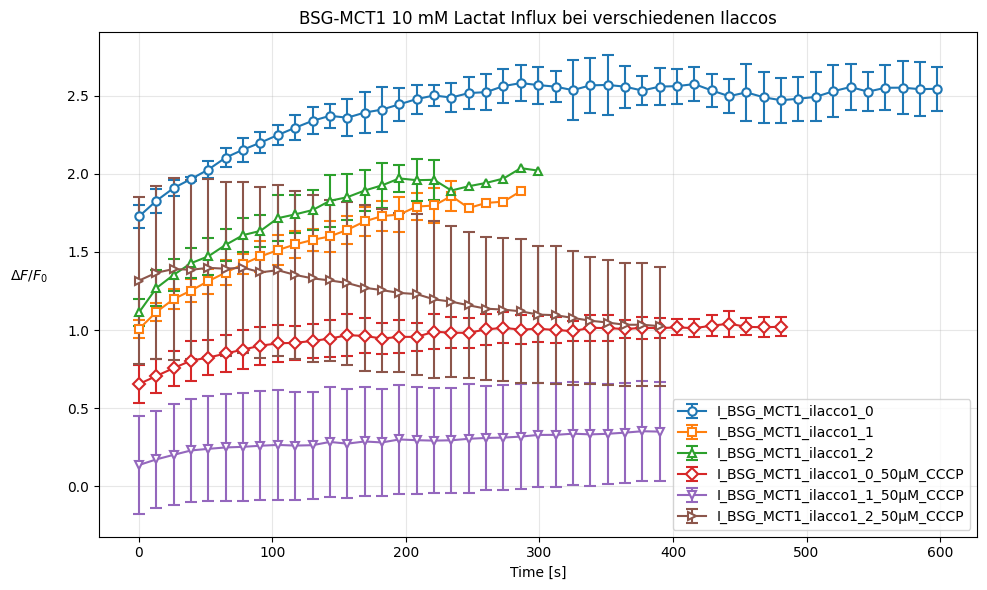

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_2_50μM_CCCP1 mM_HK_plot.png


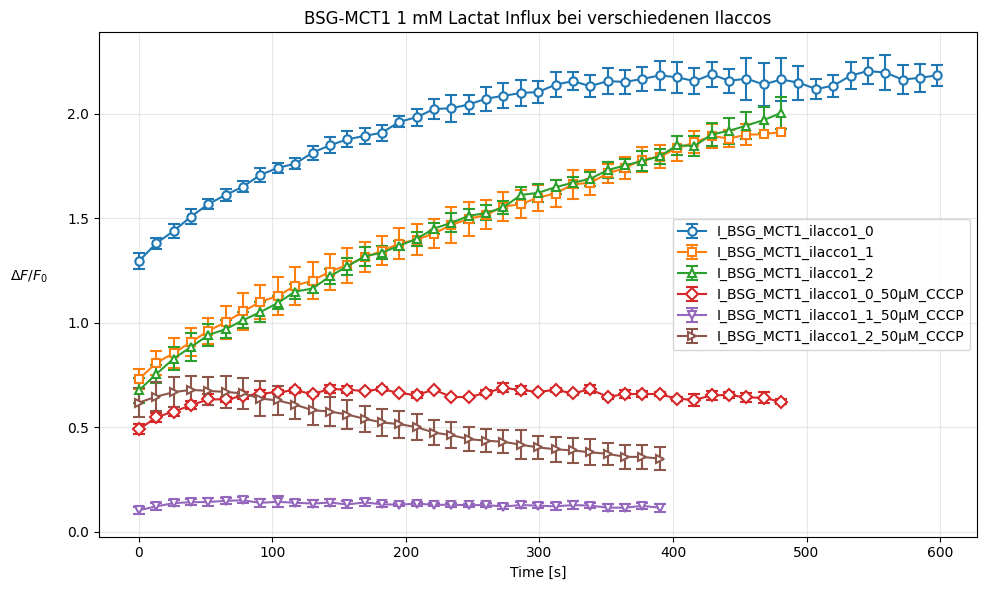

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_2_50μM_CCCP0,1 mM_HK_plot.png


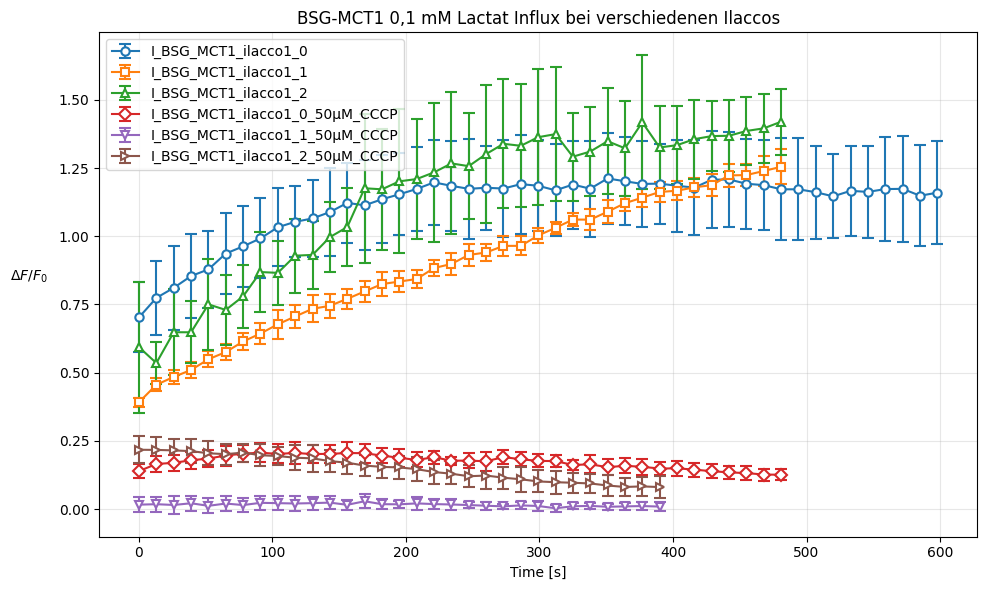

In [5]:
# Plotten der Ergebnisse
import matplotlib.pyplot as plt

data_frames = [
    ('I_BSG_MCT1_ilacco1_0','o', I_BSG_MCT1_ilacco1_0),
    ('I_BSG_MCT1_ilacco1_1', 's', I_BSG_MCT1_ilacco1_1),
    ('I_BSG_MCT1_ilacco1_2', '^', I_BSG_MCT1_ilacco1_2),
    ('I_BSG_MCT1_ilacco1_0_50μM_CCCP', 'D', I_BSG_MCT1_ilacco1_0_50μM_CCCP),
    ('I_BSG_MCT1_ilacco1_1_50μM_CCCP', 'v', I_BSG_MCT1_ilacco1_1_50μM_CCCP),
    ('I_BSG_MCT1_ilacco1_2_50μM_CCCP', '>', I_BSG_MCT1_ilacco1_2_50μM_CCCP),]
contrations = ['10 mM', '1 mM', '0,1 mM']

for conc in contrations:
    plt.figure(figsize=(10, 6))
    plt.title(f'BSG-MCT1 {conc} Lactat Influx bei verschiedenen Ilaccos')
    plt.xlabel('Time [s]')
    plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=12)
    ax = plt.gca()
    ax.yaxis.set_label_coords(-0.08, 0.5)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    for name,marker, df in data_frames:
        plt.errorbar(df["Time"], df[f"{conc} Mittelwerte"], yerr=df[f"{conc} Standardabweichung"], 
                        marker=marker, linestyle='-', label=name, capsize=4, 
                        markerfacecolor='white', markeredgewidth=1.5, markersize=6)
    plt.legend()
    outpath = os.path.join('..', 'figueres', f'{name}{conc}_HK_plot.png')
    plt.savefig(outpath, dpi=300, bbox_inches='tight')
    print(f'Saved plot: {outpath}')
    plt.show()

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_0_plot.png


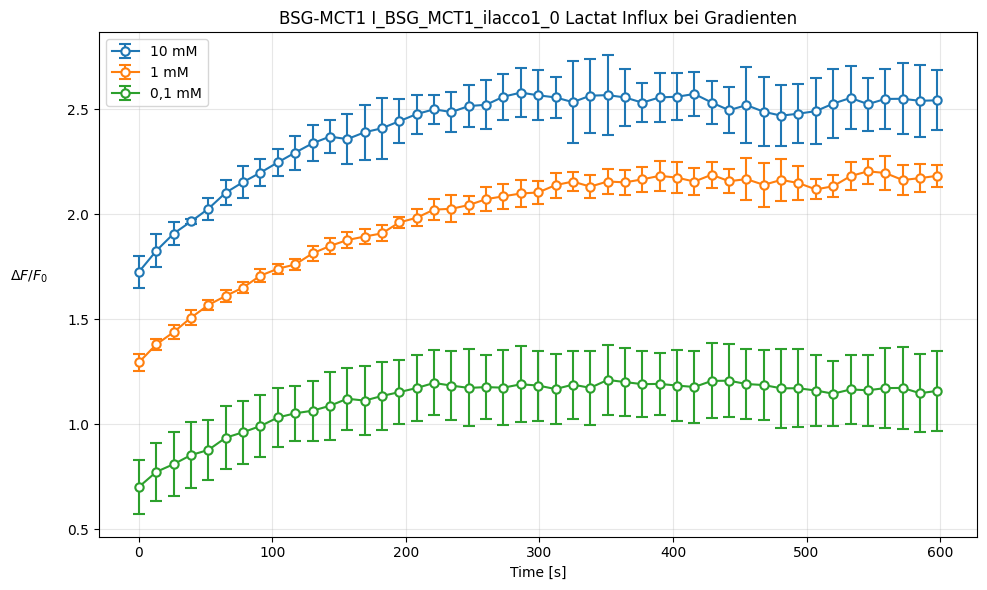

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_1_plot.png


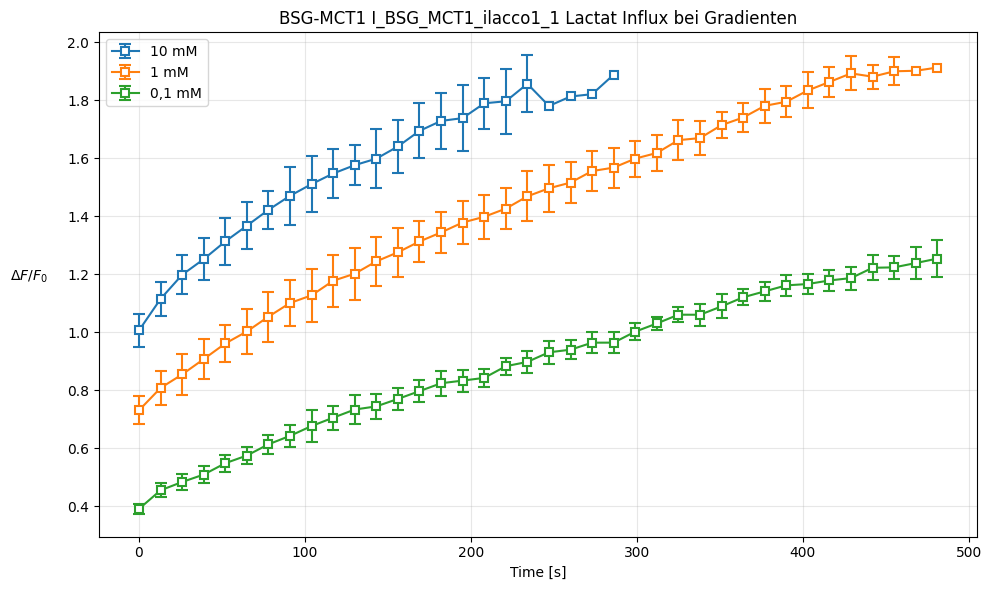

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_2_plot.png


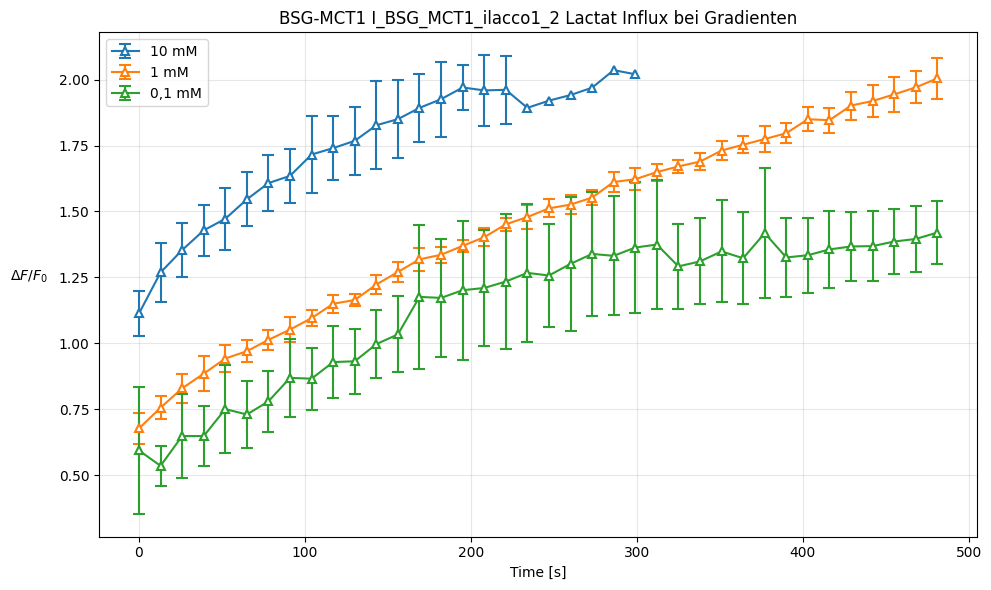

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_0_50μM_CCCP_plot.png


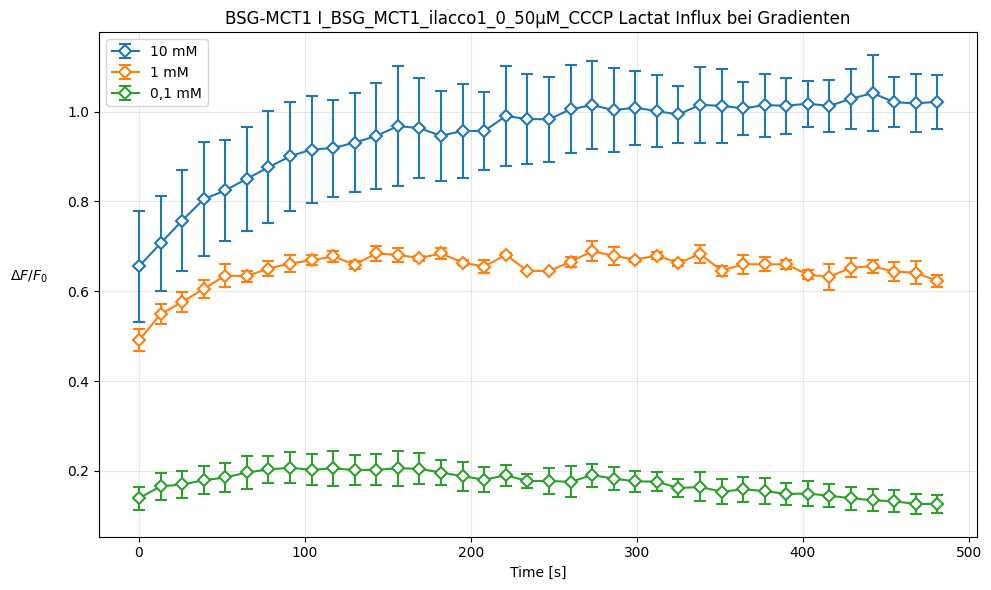

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_1_50μM_CCCP_plot.png


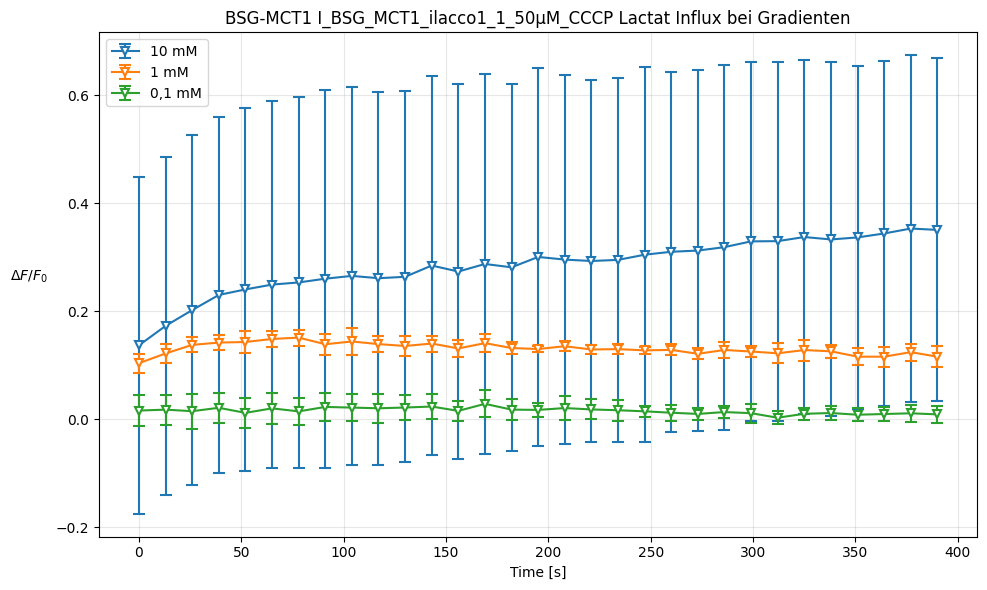

Saved plot: ../figueres/I_BSG_MCT1_ilacco1_2_50μM_CCCP_plot.png


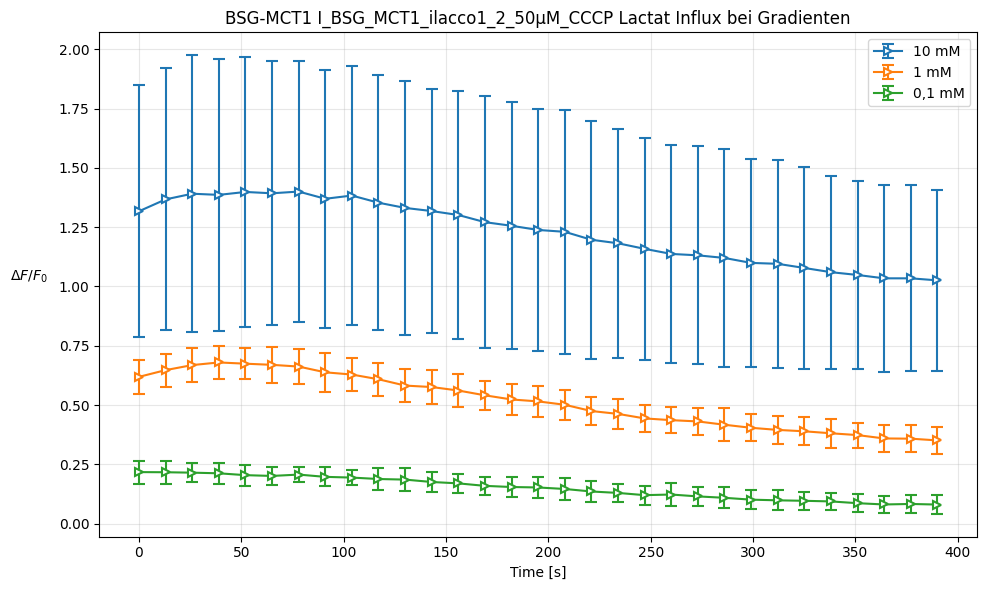

In [6]:
import matplotlib.pyplot as plt

data_frames = [
    I_BSG_MCT1_ilacco1_0,
    I_BSG_MCT1_ilacco1_1,
    I_BSG_MCT1_ilacco1_2,
    I_BSG_MCT1_ilacco1_0_50μM_CCCP,
    I_BSG_MCT1_ilacco1_1_50μM_CCCP,
    I_BSG_MCT1_ilacco1_2_50μM_CCCP]
concentrations = ['10 mM', '1 mM', '0,1 mM']

labels = ["I_BSG_MCT1_ilacco1_0", 
          "I_BSG_MCT1_ilacco1_1",
          "I_BSG_MCT1_ilacco1_2",
          "I_BSG_MCT1_ilacco1_0_50μM_CCCP",
          "I_BSG_MCT1_ilacco1_1_50μM_CCCP",
          "I_BSG_MCT1_ilacco1_2_50μM_CCCP"]
markers_list = ['o', 's', '^', 'D', 'v', '>']

for df, label, marker in zip(data_frames, labels, markers_list):
    plt.figure(figsize=(10, 6))
    plt.title(f'BSG-MCT1 {label} Lactat Influx bei Gradienten')
    plt.xlabel('Time [s]')
    plt.ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=12)
    ax = plt.gca()
    ax.yaxis.set_label_coords(-0.08, 0.5)
    plt.grid(alpha=0.3)
    plt.tight_layout()

    for conc in concentrations:
        plt.errorbar(df["Time"], df[f"{conc} Mittelwerte"], yerr=df[f"{conc} Standardabweichung"], 
                        marker=marker, linestyle='-', label=conc, capsize=4, 
                        markerfacecolor='white', markeredgewidth=1.5, markersize=6)
    plt.legend()
    outpath = os.path.join('..', 'figueres', f'{label}_plot.png')
    plt.savefig(outpath, dpi=300, bbox_inches='tight')
    print(f'Saved plot: {outpath}')
    plt.show()


Saved combined plot: ../figueres/BSG_MCT1_HK_combined_all.png


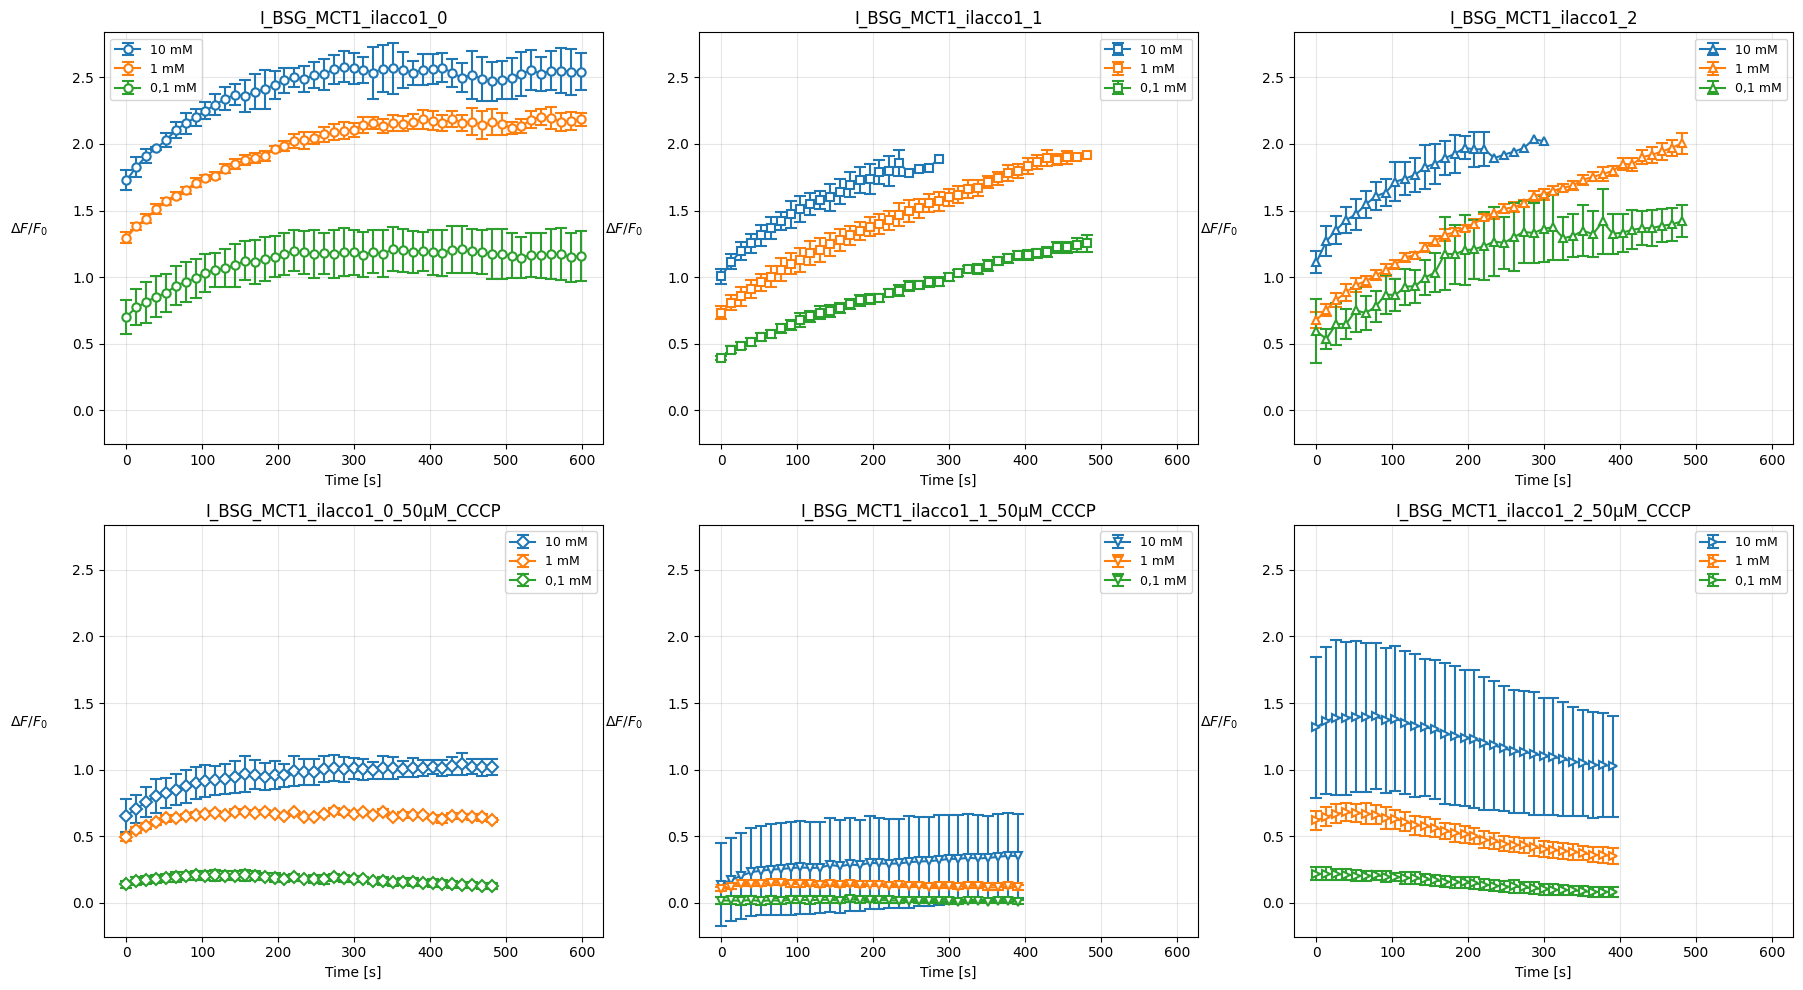

In [7]:
# Kombiniere alle Plots in eine 3x2 Subplot-Figur mit uniformer Achsenskalierung
import matplotlib.pyplot as plt

data_frames_list = [
    ('I_BSG_MCT1_ilacco1_0', 'o', I_BSG_MCT1_ilacco1_0),
    ('I_BSG_MCT1_ilacco1_1', 's', I_BSG_MCT1_ilacco1_1),
    ('I_BSG_MCT1_ilacco1_2', '^', I_BSG_MCT1_ilacco1_2),
    ('I_BSG_MCT1_ilacco1_0_50μM_CCCP', 'D', I_BSG_MCT1_ilacco1_0_50μM_CCCP),
    ('I_BSG_MCT1_ilacco1_1_50μM_CCCP', 'v', I_BSG_MCT1_ilacco1_1_50μM_CCCP),
    ('I_BSG_MCT1_ilacco1_2_50μM_CCCP', '>', I_BSG_MCT1_ilacco1_2_50μM_CCCP)]

concentrations = ['10 mM', '1 mM', '0,1 mM']

# Erstelle 3x2 Subplot-Grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Sammle alle Daten für uniforme Skalierung
all_times = []
all_values = []

for idx, (name, marker, df) in enumerate(data_frames_list):
    ax = axes[idx]
    
    for conc in concentrations:
        times = df["Time"]
        means = df[f"{conc} Mittelwerte"]
        stds = df[f"{conc} Standardabweichung"]
        
        # Sammle Werte für Skalierung
        all_times.extend(times.values)
        all_values.extend(means.values)
        
        ax.errorbar(times, means, yerr=stds, 
                   marker=marker, linestyle='-', label=conc, capsize=4, 
                   markerfacecolor='white', markeredgewidth=1.5, markersize=6)
    
    ax.set_title(name)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel(r'$\Delta F/F_0$', rotation=0, labelpad=20)
    ax.yaxis.set_label_coords(-0.15, 0.5)
    ax.grid(alpha=0.3)
    ax.legend(loc='best', fontsize=9)

# Berechne und setze uniforme Achsenskalierung
if all_times and all_values:
    x_min, x_max = min(all_times), max(all_times)
    y_min, y_max = min(all_values), max(all_values)
    x_margin = (x_max - x_min) * 0.05
    y_margin = (y_max - y_min) * 0.1
    
    for ax in axes:
        ax.set_xlim(x_min - x_margin, x_max + x_margin)
        ax.set_ylim(y_min - y_margin, y_max + y_margin)

plt.tight_layout()
outpath = os.path.join('..', 'figueres', 'BSG_MCT1_HK_combined_all.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved combined plot: {outpath}')
plt.show()

Saved: ../figueres/BSG_MCT1_ilacco1_0_exp_fits.png


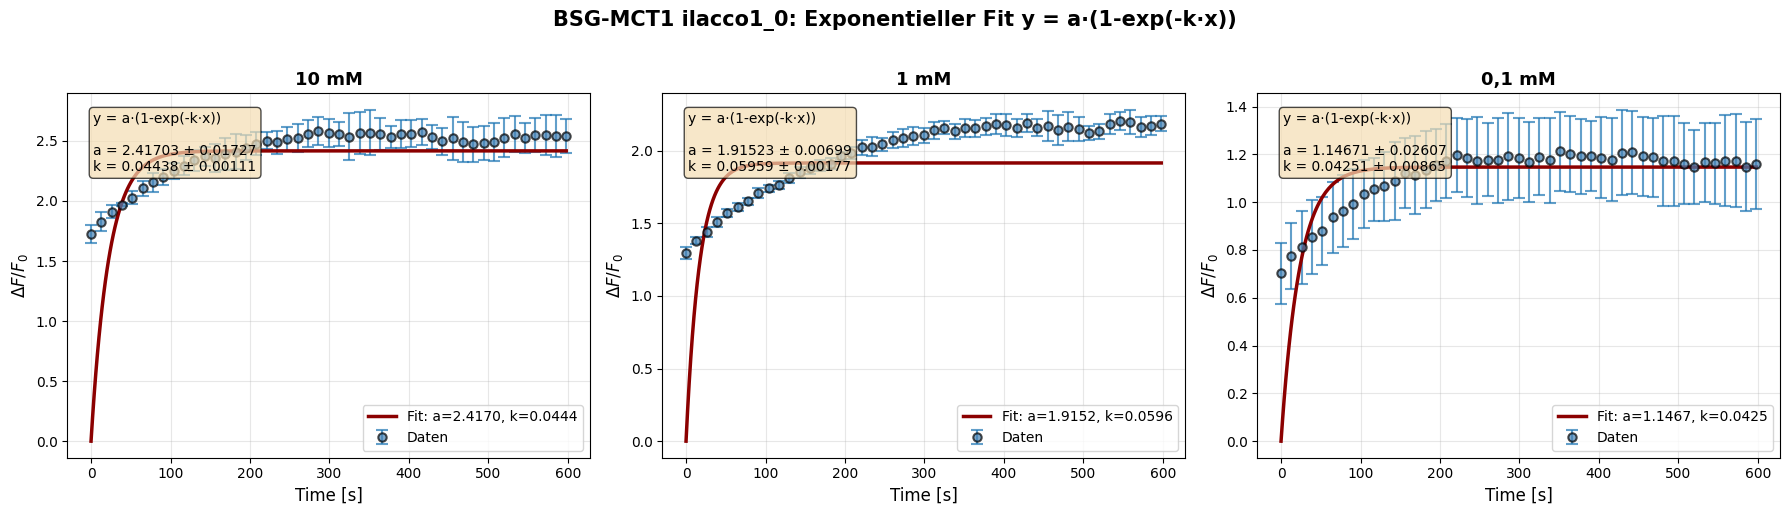

Saved: ../figueres/BSG_MCT1_ilacco1_0_a_vs_log_conc.png


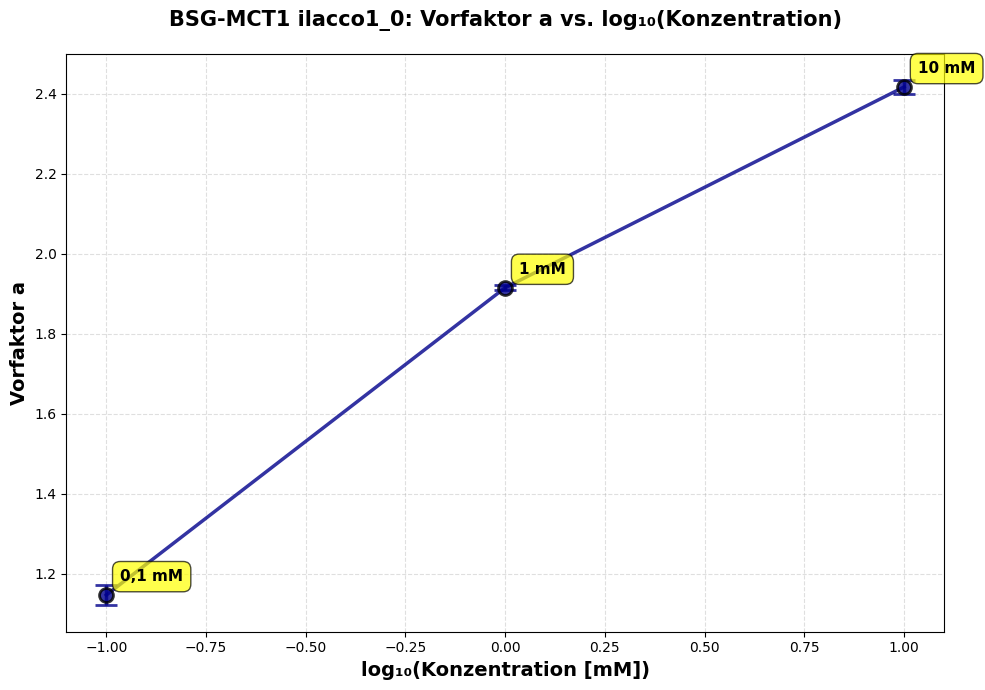


ZUSAMMENFASSUNG: Exponentieller Fit für BSG-MCT1 ilacco1_0

Fit-Funktion: y = a·(1-exp(-k·x))

10 mM (log₁₀(c) = 1.00):
  a = 2.417028 ± 0.017267
  k = 0.044378 ± 0.001106

1 mM (log₁₀(c) = 0.00):
  a = 1.915233 ± 0.006986
  k = 0.059587 ± 0.001770

0,1 mM (log₁₀(c) = -1.00):
  a = 1.146709 ± 0.026065
  k = 0.042510 ± 0.008650



In [8]:
# Exponentieller Fit für BSG_MCT1_ilacco1_0: y = a*(1-exp(-k*x))
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Definiere die Fit-Funktion
def exp_uptake(x, a, k):
    """Exponentielle Aufnahme-Funktion: y = a*(1-exp(-k*x))"""
    return a * (1 - np.exp(-k * x))

# Konzentrationen und ihre log10-Werte
concentrations = [10, 1, 0.1]  # mM
log_concentrations = [np.log10(c) for c in concentrations]
conc_labels = ['10 mM', '1 mM', '0,1 mM']

# DataFrame für BSG_MCT1_ilacco1_0
df = I_BSG_MCT1_ilacco1_0

# Listen für die Fit-Parameter
a_values = []
a_errors = []
k_values = []
k_errors = []

# Erstelle Figure mit Subplots für die Fits
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, conc_label in enumerate(conc_labels):
    ax = axes[idx]
    
    # Daten extrahieren
    times = df["Time"].values
    means = df[f"{conc_label} Mittelwerte"].values
    stds = df[f"{conc_label} Standardabweichung"].values
    
    # Entferne NaN-Werte
    mask = ~(np.isnan(times) | np.isnan(means))
    times_clean = times[mask]
    means_clean = means[mask]
    stds_clean = stds[mask]
    
    # Initialer Guess für die Parameter
    # a sollte etwa dem Maximum der Daten entsprechen
    # k sollte klein sein (0.01-0.1)
    p0 = [np.max(means_clean), 0.05]
    
    try:
        # Curve Fit durchführen
        popt, pcov = curve_fit(exp_uptake, times_clean, means_clean, 
                               p0=p0, sigma=stds_clean, absolute_sigma=True,
                               maxfev=10000)
        
        a_fit, k_fit = popt
        # Fehler aus Kovarianzmatrix
        perr = np.sqrt(np.diag(pcov))
        a_err, k_err = perr
        
        # Speichere Werte
        a_values.append(a_fit)
        a_errors.append(a_err)
        k_values.append(k_fit)
        k_errors.append(k_err)
        
        # Plotte Daten
        ax.errorbar(times_clean, means_clean, yerr=stds_clean,
                   marker='o', linestyle='', capsize=4,
                   markerfacecolor='steelblue', markeredgecolor='black',
                   markeredgewidth=1.5, markersize=6, alpha=0.7,
                   label='Daten')
        
        # Plotte Fit
        t_fit = np.linspace(times_clean.min(), times_clean.max(), 300)
        y_fit = exp_uptake(t_fit, a_fit, k_fit)
        ax.plot(t_fit, y_fit, '-', linewidth=2.5, color='darkred',
               label=f'Fit: a={a_fit:.4f}, k={k_fit:.4f}')
        
        # Textbox mit Parametern
        textstr = f'y = a·(1-exp(-k·x))\n\na = {a_fit:.5f} ± {a_err:.5f}\nk = {k_fit:.5f} ± {k_err:.5f}'
        ax.text(0.05, 0.95, textstr, transform=ax.transAxes,
               fontsize=10, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))
        
    except Exception as e:
        print(f"Fit für {conc_label} fehlgeschlagen: {e}")
        a_values.append(np.nan)
        a_errors.append(np.nan)
        k_values.append(np.nan)
        k_errors.append(np.nan)
    
    ax.set_title(f'{conc_label}', fontsize=13, fontweight='bold')
    ax.set_xlabel('Time [s]', fontsize=12)
    ax.set_ylabel(r'$\Delta F/F_0$', fontsize=12)
    ax.grid(alpha=0.3)
    ax.legend(fontsize=10, loc='best')

plt.suptitle('BSG-MCT1 ilacco1_0: Exponentieller Fit y = a·(1-exp(-k·x))', 
             fontsize=15, fontweight='bold', y=1.02)
plt.tight_layout()
outpath = os.path.join('..', 'figueres', 'BSG_MCT1_ilacco1_0_exp_fits.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved: {outpath}')
plt.show()

# Plotte Vorfaktor a gegen log10(Konzentration)
fig, ax = plt.subplots(figsize=(10, 7))

ax.errorbar(log_concentrations, a_values, yerr=a_errors,
           marker='o', linestyle='-', capsize=8, markersize=10,
           markerfacecolor='darkblue', markeredgecolor='black',
           markeredgewidth=2, linewidth=2.5, color='darkblue',
           alpha=0.8)

ax.set_xlabel('log₁₀(Konzentration [mM])', fontsize=14, fontweight='bold')
ax.set_ylabel('Vorfaktor a', fontsize=14, fontweight='bold')
ax.set_title('BSG-MCT1 ilacco1_0: Vorfaktor a vs. log₁₀(Konzentration)', 
            fontsize=15, fontweight='bold', pad=20)
ax.grid(alpha=0.4, linestyle='--')

# Füge Konzentrationslabels hinzu
for log_c, conc_label, a_val in zip(log_concentrations, conc_labels, a_values):
    ax.annotate(conc_label, xy=(log_c, a_val), 
               xytext=(10, 10), textcoords='offset points',
               fontsize=11, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7))

plt.tight_layout()
outpath = os.path.join('..', 'figueres', 'BSG_MCT1_ilacco1_0_a_vs_log_conc.png')
plt.savefig(outpath, dpi=300, bbox_inches='tight')
print(f'Saved: {outpath}')
plt.show()

# Drucke Zusammenfassung
print('\n' + '='*70)
print('ZUSAMMENFASSUNG: Exponentieller Fit für BSG-MCT1 ilacco1_0')
print('='*70)
print(f'\nFit-Funktion: y = a·(1-exp(-k·x))\n')

for conc, conc_label, log_c, a, a_err, k, k_err in zip(
    concentrations, conc_labels, log_concentrations, 
    a_values, a_errors, k_values, k_errors):
    print(f'{conc_label} (log₁₀(c) = {log_c:.2f}):')
    print(f'  a = {a:.6f} ± {a_err:.6f}')
    print(f'  k = {k:.6f} ± {k_err:.6f}')
    print()

print('='*70)